<a href="https://colab.research.google.com/github/miabaca/miabaca/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd

# Use the name of the uploaded file
df = pd.read_csv('JewelryCorp_salesdata.csv')

In [4]:
print(df.head(10)) # prints the first 10 lines

         Date   Time  StoreID  CustomerID  OrderID                Product  \
0  2024-03-18  16:40     2174      991901     2041            Onyx Anklet   
1  2024-06-27  18:29     2174      991901     8669          Opal Necklace   
2  2024-03-15  12:18     2174      991901     2317          Opal Necklace   
3  2024-08-17  17:08     2174      428138     1159         Turquoise Ring   
4  2024-06-07  09:09     2174      428138     4061  Platinum Wedding Ring   
5  2024-08-17  12:35     2174      428138     3882        Emerald Pendant   
6  2024-01-08  09:47     2174      428138     8417         Ivory Ear Cuff   
7  2024-01-01  01:18     2174      428138     2153            Onyx Anklet   
8  2024-02-29  10:23     2174      349300     9911        Emerald Pendant   
9  2023-12-17  20:05     2174      349300     6416  Yellow Gold Nose Ring   

     Price  
0  5977.12  
1  2014.36  
2  2014.36  
3  8429.58  
4  6741.59  
5  6153.70  
6  1177.23  
7  1502.71  
8  6153.70  
9  1805.47  


In [5]:
# prompt: Can you help create a report of the most prevalent products, in customer baskets

# Calculate the frequency of each product
product_counts = df['Product'].value_counts()

# Get the top 10 most frequent products
top_10_products = product_counts.head(10)

# Print the report
print("Top 10 Most Prevalent Products in Customer Baskets:\n")
top_10_products

Top 10 Most Prevalent Products in Customer Baskets:



,count
Product,
Pearl Pendant,170
Titanium Brooch,156
Titanium Ear Cuff,149
Ruby Ring,148
Amethyst Brooch,146
Yellow Gold Pendant,144
Amethyst Ring,144
Amber Ring,143
Topaz Nose Ring,143


In [6]:
# prompt: Which customers are large buyers, or have filled up large baskets. The columns are Date, Time, StoreID, CustomerID, OrderID,


# Calculate total spending per customer
customer_spending = df.groupby('CustomerID')['Price'].sum()

# Find customers with high total spending (e.g., top 10%)
large_buyers = customer_spending[customer_spending >= customer_spending.quantile(0.9)]

print("Large Buyers (Top 10% spenders):\n", large_buyers)


# Calculate the number of items per order
order_size = df.groupby('OrderID')['Product'].count()

# Find orders with a large number of items (e.g., top 10%)
large_baskets = order_size[order_size >= order_size.quantile(0.9)]

print("\nLarge Baskets (Orders with many items - Top 10%):\n", large_baskets)

Large Buyers (Top 10% spenders):
 CustomerID
100290    32551.33
100807    28689.52
100995    31951.51
102982    32858.11
103902    30939.88
            ...   
992631    32287.74
992868    34115.18
997740    29831.00
997777    39863.62
998276    35887.46
Name: Price, Length: 1030, dtype: float64

Large Baskets (Orders with many items - Top 10%):
 OrderID
1003    8
1006    7
1018    7
1028    8
1034    6
       ..
9971    8
9975    6
9989    6
9994    7
9996    6
Name: Product, Length: 1240, dtype: int64


In [7]:
# prompt: Which stores contained the large-basket buyers, and by how much


# Calculate total spending per customer
customer_spending = df.groupby('CustomerID')['Price'].sum()

# Find customers with high total spending (e.g., top 10%)
large_buyers = customer_spending[customer_spending >= customer_spending.quantile(0.9)]

# Calculate the number of items per order
order_size = df.groupby('OrderID')['Product'].count()

# Find orders with a large number of items (e.g., top 10%)
large_baskets = order_size[order_size >= order_size.quantile(0.9)]

# Merge large basket information with the original dataframe
merged_df = pd.merge(df, large_baskets.reset_index(), on='OrderID', how='inner')

# Group by store and count the number of large baskets
store_large_baskets = merged_df.groupby('StoreID')['OrderID'].count()

print("\nStores with Large Baskets (Top 10% order sizes) and the number of such orders:\n", store_large_baskets)


Stores with Large Baskets (Top 10% order sizes) and the number of such orders:
 StoreID
1011     8
1015    12
1025     9
1029     7
1045    15
        ..
9956     6
9959    14
9961    11
9971     7
9980     7
Name: OrderID, Length: 953, dtype: int64


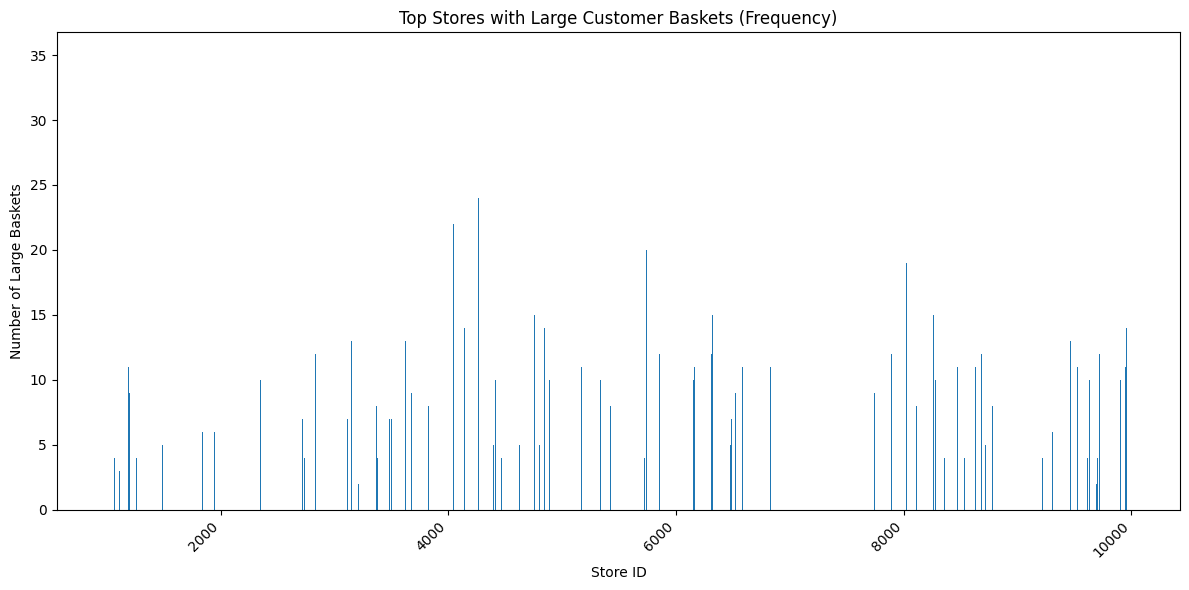

In [8]:
# prompt: A visualization that ranks the top, large-basket customer stores, by frequency

import matplotlib.pyplot as plt

# Sort stores by the number of large baskets in descending order
sorted_stores = store_large_baskets.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_stores.index, sorted_stores.values)
plt.xlabel("Store ID")
plt.ylabel("Number of Large Baskets")
plt.title("Top Stores with Large Customer Baskets (Frequency)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [9]:
# prompt: A top-n list of products, which were typical to customers in this demographic

demographic_product_counts = df.groupby(['CustomerID', 'Product'])['Product'].count().reset_index(name='Count')

# Sort within each demographic by product count
demographic_product_counts = demographic_product_counts.sort_values(['CustomerID', 'Count'], ascending=[True, False])

# Get the top N products for each demographic
top_n = 10  # Adjust as needed
top_products_by_demographic = demographic_product_counts.groupby('CustomerID').head(top_n)

print("\nTop", top_n, "Products by Customer Demographic:\n", top_products_by_demographic)


Top 10 Products by Customer Demographic:
        CustomerID                 Product  Count
0          100004  Platinum Wedding Bands      1
1          100004    Silver Wedding Bands      1
2          100004  Turquoise Wedding Ring      1
3          100010               Amber Pin      1
4          100010     Aquamarine Necklace      1
...           ...                     ...    ...
29379      999777         Titanium Anklet      1
29380      999777           Titanium Ring      1
29381      999837    Jade Engagement Ring      1
29382      999837          Pearl Necklace      1
29383      999837          Turquoise Ring      1

[29384 rows x 3 columns]


In [10]:
# prompt: A categorical approach to the above demographic – what is the categoric makeup of their baskets, on average?

# Group by customer demographic and product
demographic_product_counts = df.groupby(['CustomerID', 'Product'])['Product'].count().reset_index(name='Count')

# Sort within each demographic by product count
demographic_product_counts = demographic_product_counts.sort_values(['CustomerID', 'Count'], ascending=[True, False])

# Calculate the total count of products for each demographic
demographic_totals = demographic_product_counts.groupby('CustomerID')['Count'].sum()

# Calculate the percentage of each product within its demographic
demographic_product_counts['Percentage'] = (demographic_product_counts['Count'] / demographic_product_counts['CustomerID'].map(demographic_totals)) * 100

# Get the top N products for each demographic (e.g., top 5)
top_n = 10  # Adjust as needed
top_products_by_demographic = demographic_product_counts.groupby('CustomerID').head(top_n)

print("\nTop", top_n, "Products by Customer Demographic (with Percentages):\n", top_products_by_demographic)


Top 10 Products by Customer Demographic (with Percentages):
        CustomerID                 Product  Count  Percentage
0          100004  Platinum Wedding Bands      1   33.333333
1          100004    Silver Wedding Bands      1   33.333333
2          100004  Turquoise Wedding Ring      1   33.333333
3          100010               Amber Pin      1   50.000000
4          100010     Aquamarine Necklace      1   50.000000
...           ...                     ...    ...         ...
29379      999777         Titanium Anklet      1   33.333333
29380      999777           Titanium Ring      1   33.333333
29381      999837    Jade Engagement Ring      1   33.333333
29382      999837          Pearl Necklace      1   33.333333
29383      999837          Turquoise Ring      1   33.333333

[29384 rows x 4 columns]


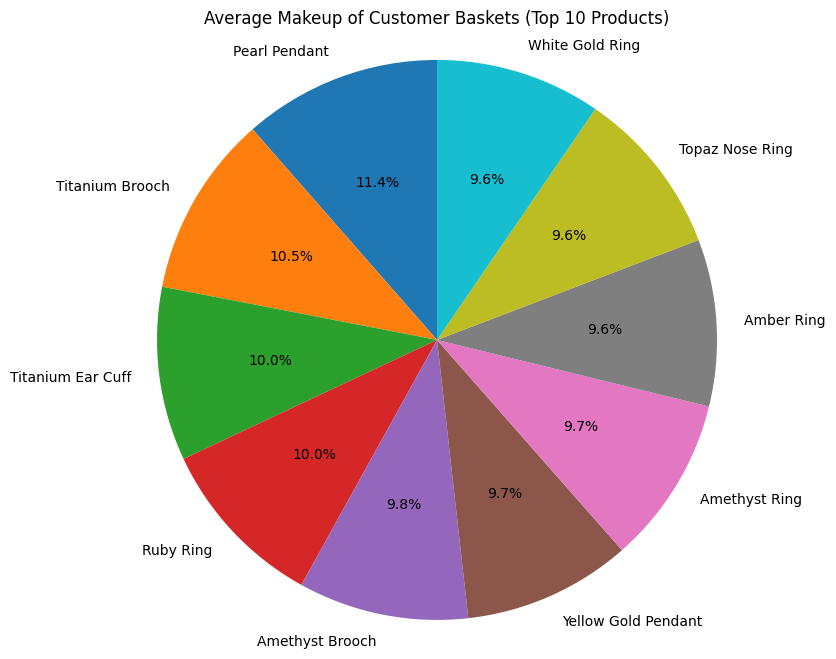

In [11]:
# prompt: Formulate a visualization that shows the average makeup of customer baskets.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded as in your provided code

# Calculate the average makeup of customer baskets (product frequency)
product_frequencies = df['Product'].value_counts(normalize=True) * 100  # Convert to percentages

# Select the top N products to display (e.g., top 10)
top_n = 10
top_products = product_frequencies.head(top_n)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Average Makeup of Customer Baskets (Top {top_n} Products)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [12]:
# prompt: what are the best selling items

# Assuming 'df' is your DataFrame and it's already loaded as in your provided code

# Calculate the frequency of each product
product_counts = df['Product'].value_counts()

# Print the top 10 best-selling items
print("Top 10 Best-Selling Items:\n")
print(product_counts.head(10))

Top 10 Best-Selling Items:

Product
Pearl Pendant          170
Titanium Brooch        156
Titanium Ear Cuff      149
Ruby Ring              148
Amethyst Brooch        146
Yellow Gold Pendant    144
Amethyst Ring          144
Amber Ring             143
Topaz Nose Ring        143
White Gold Ring        142
Name: count, dtype: int64
